In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
import MDAnalysis
from MDAnalysis.analysis import rms
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC


In [2]:
u = mda.Universe(PSF, DCD)

In [3]:
bb = u.select_atoms('backbone')

u.trajectory[0] # first frame
first = bb.positions

u.trajectory[-1] #last frame
last = bb.positions

rms.rmsd(first, last)

6.852774844656239

In [4]:
ca = u.select_atoms('name CA')
ca.write('calphas.gro')

u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone', groupselections=['name CA', 'protein'])
rmsd_analysis.run(verbose=True)

In [5]:
print(rmsd_analysis.rmsd.shape)

(98, 5)


In [6]:
import pandas as pd

rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                       columns=['Backbone', 'C-alphas', 'Protein'],
                       index=rmsd_analysis.rmsd[:, 1])
rmsd_df.index.name = 'Time (ps)'
rmsd_df.head()

,Backbone,C-alphas,Protein
Time (ps),,,
1.0,5.834344e-07,4.263638e-08,5.443850e-08
2.0,4.636592e-01,4.235205e-01,6.934167e-01
3.0,6.419340e-01,5.939111e-01,8.748416e-01
4.0,7.743983e-01,7.371346e-01,1.052780e+00
5.0,8.588600e-01,8.279498e-01,1.154986e+00


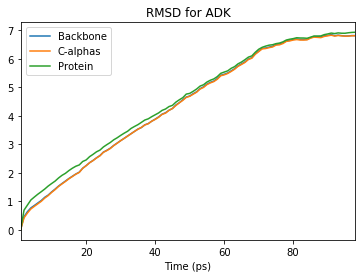

In [7]:
rmsd_df.plot(title='RMSD for ADK')